In [1]:
#本文是逻辑回归算法实现
import numpy as np
import matplotlib.pyplot as plt

#导入数据
def load_data(filename):
    data = []
    file = open(filename)
    for line in file.readlines():
        lineArr = line.strip().split(',')
        col_num = len(lineArr)
        temp = []
        for i in xrange(col_num):
            temp.append(float(lineArr[i]))
        data.append(temp)
    return np.array(data)

data = load_data('ex2data1.txt')
print data.shape
print data[:5]



X = data[:,:-1]
y = data[:,-1:]
print X.shape
print y.shape
print X[:5]
print y[:5]



(100, 3)
[[34.62365962 78.02469282  0.        ]
 [30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]]
(100, 2)
(100, 1)
[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]]


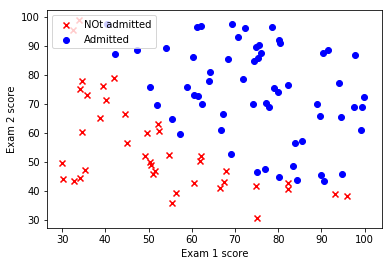

In [2]:
#可视化一下数据集
import matplotlib.pyplot as plt

label0 = np.where(y.ravel() == 0)
plt.scatter(X[label0,0],X[label0,1],marker='x',color='r',label = 'NOt admitted')
label1 = np.where(y.ravel() == 1)
plt.scatter(X[label1,0],X[label1,1],marker='o',color='b',label = 'Admitted')

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc = 'upper left')
plt.show()




In [3]:
#compute the cost计算cost以及梯度gradient

def sigmoid(x):
    return 1 / (1+np.exp(-x))
def out(x,W):
    return sigmoid(np.dot(x,W))
def compute_cost(X_train,y_train,theta):
    m = X_train.shape[0]
    J = 0
    theta = theta.reshape(-1,1)
    grad = np.zeros((X_train.shape[1],1))
    h = out(X_train,theta)
    J = -1*np.sum(y_train*np.log(h) + (1-y_train)*np.log((1-h))) / m
    grad = X_train.T.dot((h-y_train)) / m
    grad = grad.ravel()
    
    return J,grad


#test the grad，用简单的数值测试一下，编写的代码是否计算正确

m = X.shape[0]
one = np.ones((m,1))
X = np.hstack((one,data[:,:-1]))
W = np.zeros((X.shape[1],1))

cost,grad = compute_cost(X,y,W)
print cost
print grad

cost1,grad1 = compute_cost(X,y,np.array([[-24],[0.2],[0.2]]))






print 'compute with w=[-24,0.2,0.2]'
print 'Expected cost (approx):0.218....'
print cost1
print 'Expected gradients (approx): [0.04,2.566,0.646]'
print grad1

0.6931471805599453
[ -0.1        -12.00921659 -11.26284221]
compute with w=[-24,0.2,0.2]
Expected cost (approx):0.218....
0.21833019382659777
Expected gradients (approx): [0.04,2.566,0.646]
[0.04290299 2.56623412 2.64679737]


In [13]:
#这里使用了最优算法，不是选择梯度下降法，例如你可以选择BFGS等
from scipy import optimize
params = np.zeros((X.shape[1],1)).ravel()
args = (X,y)

def f(params,*args):
    X_train,y_train = args
    m,n = X_train.shape
    J = 0
    theta = params.reshape(n,1)
    h = out(X_train,theta)
    J = -1*np.sum(y_train*np.log(h) + (1-y_train)*np.log((1-h))) / m
    
    return J

def gradf(params,*args):
    X_train,y_train = args
    m,n = X_train.shape
    theta = params.reshape(-1,1)
    h = out(X_train,theta)
    grad = np.zeros((X_train.shape[1],1))
    grad = X_train.T.dot((h-y_train))  / m
    g = grad.ravel()
    return g

#res = optimize.minimize(f,x0=init_theta,args=args,method='BFGS',jac=gradf,\
#                        options={'gtol': 1e-6, 'disp': True})

res = optimize.fmin_cg(f,x0=params,fprime=gradf,args=args,maxiter=500)
print res




Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 47
         Function evaluations: 112
         Gradient evaluations: 112
[-25.16800605   0.20628507   0.20152561]


/home/x/.local/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/home/x/.local/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':


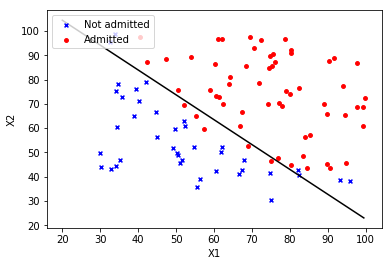

In [18]:
#可视化一下线性的决策边界



label = np.array(y)
index_0 = np.where(label.ravel()==0)
plt.scatter(X[index_0,1],X[index_0,2],marker='x'\
            ,color = 'b',label = 'Not admitted',s = 15)
index_1 =np.where(label.ravel()==1)
plt.scatter(X[index_1,1],X[index_1,2],marker='o',\
            color = 'r',label = 'Admitted',s = 15)

#show the decision boundary
x1 = np.arange(20,100,0.5)
x2 = (- res[0] - res[1]*x1) / res[2]
plt.plot(x1,x2,color = 'black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc = 'upper left')
plt.show()


In [20]:
#预测函数
def predict(X,theta):
    h = out(X,theta)
    y_pred = np.where(h>=0.5,1.0,0)
    
    return y_pred 

#test
prob = out(np.array([[1,45,85]]),res)
print "For a student with scores 45 and \
85, we predict an admission "
print "Expected value: 0.775 +/- 0.002"

print prob

p = predict(X,res)
print "Expected accuracy (approx): 89.0"
print np.mean(p==y.ravel())
    

For a student with scores 45 and 85, we predict an admission 
Expected value: 0.775 +/- 0.002
[0.77634616]
Expected accuracy (approx): 89.0
0.89


In [21]:
#下面是自己整理的逻辑回归类，所以，如果想写的规范，也可以自己整理成class
import numpy as np

class logistic(object):
    def __init__(self):
        self.W = None
    def train(self,X,y,learn_rate = 0.01,num_iters = 2000):
        num_train,num_feature = X.shape
        #init the weight
        self.W = 0.001*np.random.randn(num_feature,1).reshape((-1,1))
        loss = []
        
        for i in range(num_iters):
            error,dW = self.compute_loss(X,y)
            self.W += -learn_rate*dW
            
            loss.append(error)
            if i%200==0:
                print 'i=%d,error=%f' %(i,error)
        return loss
    def compute_loss(self,X,y):
        num_train = X.shape[0]
        h = self.output(X)
        loss = -np.sum((y*np.log(h) + (1-y)*np.log((1-h))))
        loss = loss / num_train
        
        dW = X.T.dot((h-y)) / num_train
    
        return loss,dW
    
    def output(self,X):
        g = np.dot(X,self.W)
        return self.sigmod(g)
    def sigmod(self,X):
        return 1/(1+np.exp(-X))
    
    def predict(self,X_test):
        h = self.output(X_test)
        y_pred = np.where(h>=0.5,1,0)
        return y_pred
    

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]]
[1 1 1 1 1]


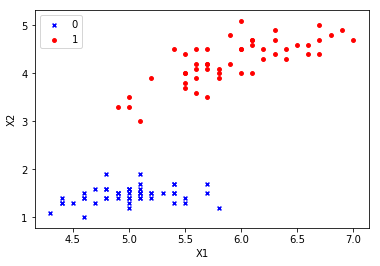

In [23]:
#用iris数据集去测试
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
data = iris.data
target = iris.target
#print data[:10]
#print target[10:]
X = data[0:100,[0,2]]
y = target[0:100]
print X[:5]
print y[-5:]
label = np.array(y)
index_0 = np.where(label.ravel()==0)
plt.scatter(X[index_0,0],X[index_0,1],marker='x',color = 'b',label = '0',s = 15)
index_1 =np.where(label.ravel()==1)
plt.scatter(X[index_1,0],X[index_1,1],marker='o',color = 'r',label = '1',s = 15)

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc = 'upper left')
plt.show()


i=0,error=0.692771
i=200,error=0.363855
i=400,error=0.237811
i=600,error=0.174871
i=800,error=0.138006
i=1000,error=0.114006
i=1200,error=0.097201
i=1400,error=0.084799
i=1600,error=0.075277
i=1800,error=0.067737
[[-0.46076571]
 [-1.19579912]
 [ 2.53586801]]


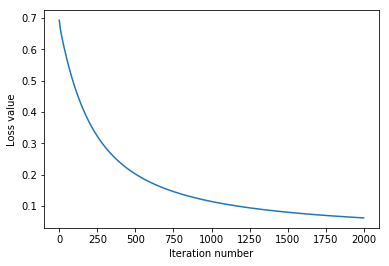

In [25]:
#观察并且可视化一下训练过程
import matplotlib.pyplot as plt

y = y.reshape((-1,1)) #有时候经常需要reshape,我建议多用，避免不必要的bug
#add the x0=1
one = np.ones((X.shape[0],1))
X_train = np.hstack((one,X))
classify = logistic()
loss = classify.train(X_train,y)
print classify.W

plt.plot(loss)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')


plt.show()

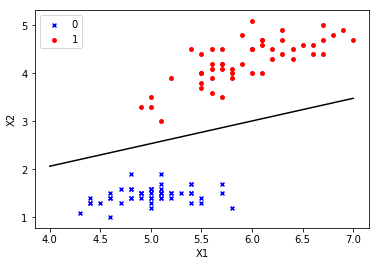

In [26]:
#可视化一下决策边界
label = np.array(y)
index_0 = np.where(label.ravel()==0)
plt.scatter(X[index_0,0],X[index_0,1],marker='x',color = 'b',label = '0',s = 15)
index_1 =np.where(label.ravel()==1)
plt.scatter(X[index_1,0],X[index_1,1],marker='o',color = 'r',label = '1',s = 15)

#show the decision boundary
x1 = np.arange(4,7.5,0.5)
x2 = (- classify.W[0] - classify.W[1]*x1) / classify.W[2]
plt.plot(x1,x2,color = 'black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc = 'upper left')
plt.show()